They're alive! Monsters can move. They're, not smart, but they should be able to catch a wandering hero more often, just from covering more tiles.

In [1]:
import matplotlib.pyplot as plt
from treasure_hunt.environment import BaseTreasureHuntEnv as Environment
from treasure_hunt.agent import SimplifierQLearner
from gymnasium.wrappers import TimeLimit

from treasure_hunt.environment import FlattenTreasureWrapper

from treasure_hunt.environment.monster_strategy import RandomMovementStrategy

from treasure_hunt.utils import AdaptiveRLRunner, run_with_render

from stable_baselines3 import DQN

In [2]:
# Initialize environment and agent
env = TimeLimit(FlattenTreasureWrapper(Environment(monster_strategy=RandomMovementStrategy())), 500) # Truncate at 500 steps
agent = DQN('MlpPolicy', env)

In [3]:
agent.min_exploration_rate=.1

In [4]:
# Setup runner
runner = AdaptiveRLRunner(agent=agent, env=env, total_epochs=10, target_std_ratio=.5)

In [5]:
# Train the agent
runner.train_agent()

Epoch 1/10 - Training complete
Epoch 1/10 - Mean reward: -1138.0
Epoch 2/10 - Training complete
Epoch 2/10 - Mean reward: -1238.2
Epoch 3/10 - Training complete
Epoch 3/10 - Mean reward: -2324.0
Epoch 4/10 - Training complete
Epoch 4/10 - Mean reward: -1100.4
Epoch 5/10 - Training complete
Epoch 5/10 - Mean reward: -2471.4
Epoch 6/10 - Training complete
Epoch 6/10 - Mean reward: -219.4
Epoch 7/10 - Training complete
Epoch 7/10 - Mean reward: -1320.0
Epoch 8/10 - Training complete
Epoch 8/10 - Mean reward: -249.0
Epoch 9/10 - Training complete
Epoch 9/10 - Mean reward: -836.0
Epoch 10/10 - Training complete
Adapted evaluation episodes to 5 based on std ratio 0.41235478099063905
Epoch 10/10 - Mean reward: -1876.0


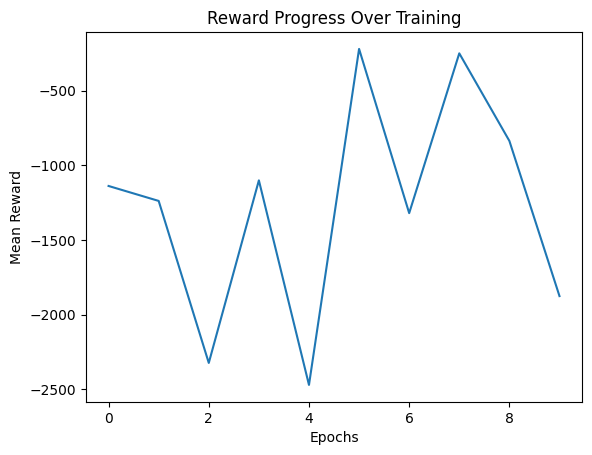

In [6]:
runner.plot_results()

In [7]:
# Evaluate the agent
runner.test_agent(final_test=True)
print(f"Mean Reward after training: {runner.reward_history[-1]}")

Mean Reward after training: -2376.0


In [8]:
runner.save_results()

Results saved to the 'results/qlearner-static/20241227_154554' folder.


In [9]:
# Initialize the environment with 'human' render mode
env_human = FlattenTreasureWrapper(Environment(monster_strategy=RandomMovementStrategy(),render_mode="human"))

run_with_render(env_human, agent, n_episodes=10)

# Close the environment
env_human.close()

In [10]:
# Extra close in case the cell above crashes
env_human.close()